In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_sub =  pd.read_csv('SUB_WEEKLY_FINAL_1.csv')
pd.set_option("display.max_columns", None)
df_sub.head(5)
#print(list(df))

ID    GROUP ENROLMENTDATE INITIALCAREPLAN TIME_SESSION1  \
0   1   Active        20-Apr             3x4    20-04-2022   
1   2   Active        20-Apr            3x4     20-04-2022   
2   3  Passive        23-Apr             2x6    23-04-2022   
3   4   Active        19-Apr             3x4    19-04-2022   
4   5   Active        21-Apr             3x4    21-04-2022   

   TIME/SESSION1_APEXPOSTSX  TIME/SESSION1_BASEPOSTERIORSX  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         3                              0   
4                         0                              0   

   TIME/SESSION1_BASEPOSTSX  TIME/SESSION1_C0BILAT  TIME/SESSION1_C0PS  \
0                         0                      0                   0   
1                         0                      0                   0   
2                         0                      0                   0   
3                         0                      0                   0   
4                         0                      0                   0   

   TIME/SESSION1_C1ASI  TIME/SESSION1_C1ASL  TIME/SESSION1_C1ASR  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   TIME/SESSION1_C1PIL  TIME/SESSION1_C1PIR  TIME/SESSION1_C2ARP  \
0                    0                    6                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    9                    0   

   TIME/SESSION1_C2BL  TIME/SESSION1_C2BR  TIME/SESSION1_C3BL  \
0                   9                   0                   0   
1                   0                   6                   0   
2                   0                   9                   0   
3                   9                   0                   0   
4                   0                   0                   0   

   TIME/SESSION1_C3BR  TIME/SESSION1_C4  TIME/SESSION1_C4BL  \
0                   0                 0                   0   
1                   0                 0                   0   
2                   0                 0                   6   
3                   0                 0                   0   
4                   0                 0                   0   

   TIME/SESSION1_C4BR  TIME/SESSION1_C5BL  TIME/SESSION1_C5BR  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   TIME/SESSION1_C6BL  TIME/SESSION1_C6BR  TIME/SESSION1_C7BL  \
0                   0                   0                   0   
1                   2                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   4                   0                   0   

   TIME/SESSION1_CT6BR  TIME/SESSION1_L1BILAT  TIME/SESSION1_L1BL  \
0                    0                      0                   0   
1                    0                      0                   0   
2                    0                      0                   0   
3                    0                      0                   0   
4                    0                      0                   0   

   TIME/SESSION1_L1BR  TIME

In [2]:
import pandas as pd

# Assume your current DataFrame looks like this:
# df has columns: 'ID', 'FIRST', 'MID', 'LAST', ... (and maybe more)

# Step 1: Melt to long format
df_long = pd.melt(
    df_sub,
    id_vars=['ID','GROUP'],  # Add other static columns like 'GROUP', 'AGE' if needed
    value_vars=['FIRST', 'MID', 'LAST'],
    var_name='Week',
    value_name='Score'
)

# Step 2: Map Week to numeric
week_map = {'FIRST': 0, 'MID': 6, 'LAST': 12}
df_long['Week'] = df_long['Week'].map(week_map)

# Optional: Sort by ID and Week
df_long = df_long.sort_values(['ID', 'Week']).reset_index(drop=True)


In [3]:
df_long.head()

,ID,GROUP,Week,Score
0,1,Active,0,23.00
1,1,Active,6,17.67
2,1,Active,12,12.67
3,2,Active,0,21.00
4,2,Active,6,10.67


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df1 =  pd.read_csv('BalanceOutcomes.csv')
df1 = df1.rename(columns={'Part': 'ID'})
pd.set_option("display.max_columns", None)
df1.head(5)

,ID,Week,Task,Qual,PS R,PS ML,PS AP
0,10,0,Compliant,EC,3.064781,3.955239,3.884608
1,10,0,Compliant,EO,3.193246,4.038658,3.980261
2,10,0,Firm,EC,3.635722,4.460273,4.124975
3,10,0,Firm,EO,3.560634,4.313638,4.091500
4,10,12,Compliant,EC,3.069993,4.136390,3.863881


In [5]:
# Step 1: Filter only weeks 0, 6, 12
df_filtered = df1[df1['Week'].isin([0, 6, 12])].copy()

# Step 2: Create a new column for the combination
df_filtered['Task_Qual'] = df_filtered['Task'] + '_' + df_filtered['Qual']

# Step 3: Pivot — make Task_Qual values into columns, PS R as values
df_pivot = df_filtered.pivot_table(
    index=['ID', 'Week'],
    columns='Task_Qual',
    values='PS R'
)

# Step 4: Flatten column names
df_pivot.columns = [f'PSR_{col}' for col in df_pivot.columns]

# Step 5: Reset index
df_pivot = df_pivot.reset_index()
df_pivot.head()

,ID,Week,PSR_Compliant_EC,PSR_Compliant_EO,PSR_Firm_EC,PSR_Firm_EO
0,1,0,2.449264,2.870729,3.022863,2.994831
1,1,6,2.608000,3.007683,3.058034,3.004069
2,1,12,2.835134,2.959680,3.676394,3.814218
3,2,0,2.293872,2.625070,3.350297,3.404530
4,2,6,2.379210,2.927952,3.100223,3.264655


In [6]:
df3 =  pd.read_csv('GaitOutcomes.csv')
df3 = df3.rename(columns={'Part': 'ID'})
pd.set_option("display.max_columns", None)
df3.head(5)

,ID,Week,Task,Qual,Gait symmetry,Step length,Step length left,Step length right,Step time,Step time left,Step time right,Step length var,Step time var,Step length asym,Step time asym,Step velocity,Step count lap 1,Step count lap 2,Step count lap 3,Step count lap 4
0,1,0,Walk,HF,58.741242,0.538958,0.524019,0.559210,0.67,0.645,0.685,6.981735,6.363109,6.529532,5.970149,0.801715,6,6,6,6
1,1,0,Walk,HT,60.758268,0.553679,0.526143,0.578098,0.68,0.640,0.700,6.107576,6.739852,9.383617,8.823529,0.816422,5,6,6,6
2,1,12,Walk,HF,61.337303,0.609362,0.606898,0.618235,0.64,0.645,0.640,4.361078,3.772687,1.860431,0.781250,0.930661,6,6,6,6
3,1,12,Walk,HT,61.568876,0.616855,0.608583,0.618366,0.63,0.635,0.630,5.046451,5.323566,1.585971,0.793651,0.982006,6,6,7,6
4,1,16,Walk,HF,61.679948,0.604644,0.587185,0.621642,0.67,0.670,0.685,11.514833,6.505584,5.698726,2.238806,0.915398,6,5,6,6


In [7]:
# Step 1: Filter for weeks 0, 6, 12
df_gait_filtered = df3[df3['Week'].isin([0, 6, 12])].copy()

# Step 2: Clean whitespace if needed
df_gait_filtered['Task'] = df_gait_filtered['Task'].str.strip()
df_gait_filtered['Qual'] = df_gait_filtered['Qual'].str.strip()

# Step 3: Create identifier column
df_gait_filtered['Task_Qual'] = df_gait_filtered['Task'] + '_' + df_gait_filtered['Qual']

# Step 4: Select only desired gait variables
gait_vars = ['Gait symmetry', 'Step length', 'Step time', 'Step velocity']

# Step 5: Pivot each gait variable separately and merge
from functools import reduce

pivoted_gait = []

for var in gait_vars:
    temp = df_gait_filtered.pivot_table(
        index=['ID', 'Week'],
        columns='Task_Qual',
        values=var
    )
    temp.columns = [f'{var.replace(" ", "")}_{col}' for col in temp.columns]
    pivoted_gait.append(temp)

# Step 6: Merge all pivoted gait variables side-by-side
df_gait_wide = reduce(lambda left, right: pd.merge(left, right, on=['ID', 'Week'], how='outer'), pivoted_gait)

# Step 7: Reset index
df_gait_wide = df_gait_wide.reset_index()
df_gait_wide.head()

,ID,Week,Gaitsymmetry_Walk_HF,Gaitsymmetry_Walk_HT,Steplength_Walk_HF,Steplength_Walk_HT,Steptime_Walk_HF,Steptime_Walk_HT,Stepvelocity_Walk_HF,Stepvelocity_Walk_HT
0,1,0,58.741242,60.758268,0.538958,0.553679,0.67,0.68,0.801715,0.816422
1,1,6,62.676928,52.087552,0.505224,0.519363,0.66,0.70,0.740778,0.780507
2,1,12,61.337303,61.568876,0.609362,0.616855,0.64,0.63,0.930661,0.982006
3,2,0,65.413925,66.124260,0.585015,0.548978,0.67,0.64,0.868019,0.853078
4,2,6,64.427727,66.920432,0.566429,0.531554,0.75,0.68,0.739722,0.796473


In [8]:
# Merge df_long with df_pivot on ID and Week
df_merged_1 = pd.merge(df_long, df_pivot, on=['ID', 'Week'], how='left')

# Merge the result with df_gait_wide on ID and Week
df_master = pd.merge(df_merged_1, df_gait_wide, on=['ID', 'Week'], how='left')
df_master.head()

,ID,GROUP,Week,Score,PSR_Compliant_EC,PSR_Compliant_EO,PSR_Firm_EC,PSR_Firm_EO,Gaitsymmetry_Walk_HF,Gaitsymmetry_Walk_HT,Steplength_Walk_HF,Steplength_Walk_HT,Steptime_Walk_HF,Steptime_Walk_HT,Stepvelocity_Walk_HF,Stepvelocity_Walk_HT
0,1,Active,0,23.00,2.449264,2.870729,3.022863,2.994831,58.741242,60.758268,0.538958,0.553679,0.67,0.68,0.801715,0.816422
1,1,Active,6,17.67,2.608000,3.007683,3.058034,3.004069,62.676928,52.087552,0.505224,0.519363,0.66,0.70,0.740778,0.780507
2,1,Active,12,12.67,2.835134,2.959680,3.676394,3.814218,61.337303,61.568876,0.609362,0.616855,0.64,0.63,0.930661,0.982006
3,2,Active,0,21.00,2.293872,2.625070,3.350297,3.404530,65.413925,66.124260,0.585015,0.548978,0.67,0.64,0.868019,0.853078
4,2,Active,6,10.67,2.379210,2.927952,3.100223,3.264655,64.427727,66.920432,0.566429,0.531554,0.75,0.68,0.739722,0.796473


In [9]:
# Step 1: Find columns with missing values
nan_cols = df_master.columns[df_master.isna().any()]
print("🧪 Columns with missing values:\n", nan_cols.tolist())


🧪 Columns with missing values:
 ['PSR_Compliant_EC', 'PSR_Compliant_EO', 'PSR_Firm_EC', 'PSR_Firm_EO', 'Gaitsymmetry_Walk_HF', 'Gaitsymmetry_Walk_HT', 'Steplength_Walk_HF', 'Steplength_Walk_HT', 'Steptime_Walk_HF', 'Steptime_Walk_HT', 'Stepvelocity_Walk_HF', 'Stepvelocity_Walk_HT']


In [10]:
# Step 2: For each column with NaN, list which IDs are affected
for col in nan_cols:
    ids_with_nan = df_master[df_master[col].isna()]['ID'].unique()
    print(f"\n⚠️ Column '{col}' has NaN for IDs: {ids_with_nan.tolist()}")



⚠️ Column 'PSR_Compliant_EC' has NaN for IDs: [4, 6, 12, 41, 66, 70, 75, 110, 179, 240, 250]

⚠️ Column 'PSR_Compliant_EO' has NaN for IDs: [4, 6, 12, 41, 66, 70, 75, 110, 179, 240, 250]

⚠️ Column 'PSR_Firm_EC' has NaN for IDs: [4, 6, 12, 41, 66, 70, 75, 110, 179, 240, 250]

⚠️ Column 'PSR_Firm_EO' has NaN for IDs: [4, 6, 12, 41, 66, 70, 75, 110, 179, 240, 250]

⚠️ Column 'Gaitsymmetry_Walk_HF' has NaN for IDs: [4, 6, 12, 41, 66, 70, 75, 110, 179, 240, 250]

⚠️ Column 'Gaitsymmetry_Walk_HT' has NaN for IDs: [4, 6, 12, 41, 66, 70, 75, 110, 165, 179, 240, 250]

⚠️ Column 'Steplength_Walk_HF' has NaN for IDs: [4, 6, 12, 41, 66, 70, 75, 110, 179, 240, 250]

⚠️ Column 'Steplength_Walk_HT' has NaN for IDs: [4, 6, 12, 41, 66, 70, 75, 110, 165, 179, 240, 250]

⚠️ Column 'Steptime_Walk_HF' has NaN for IDs: [4, 6, 12, 41, 66, 70, 75, 110, 179, 240, 250]

⚠️ Column 'Steptime_Walk_HT' has NaN for IDs: [4, 6, 12, 41, 66, 70, 75, 110, 165, 179, 240, 250]

⚠️ Column 'Stepvelocity_Walk_HF' has NaN f

In [12]:
# List of columns to clean
cols_to_fill = [
    'PSR_Compliant_EC', 'PSR_Compliant_EO', 'PSR_Firm_EC', 'PSR_Firm_EO',
    'Gaitsymmetry_Walk_HF', 'Gaitsymmetry_Walk_HT',
    'Steplength_Walk_HF', 'Steplength_Walk_HT',
    'Steptime_Walk_HF', 'Steptime_Walk_HT',
    'Stepvelocity_Walk_HF', 'Stepvelocity_Walk_HT'
]

# Replace NaNs with 0 in those columns
df_master[cols_to_fill] = df_master[cols_to_fill].fillna(0)


In [13]:
print("✅ Any remaining NaNs in key columns:", df_master[cols_to_fill].isna().sum().sum())


✅ Any remaining NaNs in key columns: 0


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_master['GROUP'] = le.fit_transform(df_master['GROUP'])


In [22]:
# 🔁 Reconstruct X_final and y_final from df_master
# Target column: 'PSR_Compliant_EC'
# Features: all other numeric columns except 'ID', 'Week', 'Score', and target

exclude_cols = ['ID', 'Week', 'Gaitsymmetry_Walk_HT']
feature_cols = [col for col in df_master.columns if col not in exclude_cols]

# Sort and reshape
df_master_sorted = df_master.sort_values(by=['ID', 'Week'])

# Group by ID
X_final = df_master_sorted.groupby('ID')[feature_cols].apply(lambda x: x.values).to_numpy()
y_final = df_master_sorted.groupby('ID')['Gaitsymmetry_Walk_HT'].apply(lambda x: x.values).to_numpy()

# Ensure proper shapes
X_final = np.stack(X_final)
y_final = np.stack(y_final)


In [23]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import tensorflow as tf

# -------------------------------
# 📦 1. Prepare Data
# -------------------------------
# X_final and y_final assumed to be prepared already
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# -------------------------------
# ⚙️ 2. Define Parameter Grid
# -------------------------------
param_grid = {
    'epochs': [50, 100],
    'batch_size': [16, 32],
    'neurons': [32, 64]
}

repeats = 10
results = []

# -------------------------------
# 🚀 3. Run Grid Search
# -------------------------------
for epoch in param_grid['epochs']:
    for batch in param_grid['batch_size']:
        for units in param_grid['neurons']:
            train_losses = []
            val_losses = []

            print(f"\n🔄 Running for: epochs={epoch}, batch_size={batch}, neurons={units} ...")
            for run in tqdm(range(repeats), desc="🔁 Repeat Runs"):
                tf.keras.backend.clear_session()

                model = Sequential([
                    Masking(mask_value=0.0, input_shape=(X_train.shape[1], X_train.shape[2])),
                    LSTM(units, return_sequences=False),
                    Dense(1)
                ])

                model.compile(optimizer=Adam(), loss='mse')
                history = model.fit(X_train, y_train,
                                    validation_data=(X_test, y_test),
                                    epochs=epoch,
                                    batch_size=batch,
                                    verbose=0,
                                    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

                train_loss = history.history['loss'][-1]
                val_loss = history.history['val_loss'][-1]

                train_losses.append(train_loss)
                val_losses.append(val_loss)

            # Log results
            results.append({
                'epochs': epoch,
                'batch_size': batch,
                'neurons': units,
                'train_loss_mean': np.mean(train_losses),
                'train_loss_std': np.std(train_losses),
                'val_loss_mean': np.mean(val_losses),
                'val_loss_std': np.std(val_losses)
            })

# -------------------------------
# 💾 4. Convert to DataFrame
# -------------------------------
results_df = pd.DataFrame(results)
results_df.sort_values(by='val_loss_mean', inplace=True)
print("\n✅ Top 5 Configurations by Validation Loss:")
print(results_df.head())





🔄 Running for: epochs=50, batch_size=16, neurons=32 ...


🔁 Repeat Runs:   0%|                                                                           | 0/10 [00:00<?, ?it/s]C:\Users\ASUS\New folder\Lib\site-packages\keras\src\layers\core\masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
🔁 Repeat Runs: 100%|██████████████████████████████████████████████████████████████████| 10/10 [00:54<00:00,  5.47s/it]



🔄 Running for: epochs=50, batch_size=16, neurons=64 ...


🔁 Repeat Runs: 100%|██████████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.37s/it]



🔄 Running for: epochs=50, batch_size=32, neurons=32 ...


🔁 Repeat Runs: 100%|██████████████████████████████████████████████████████████████████| 10/10 [00:51<00:00,  5.16s/it]



🔄 Running for: epochs=50, batch_size=32, neurons=64 ...


🔁 Repeat Runs: 100%|██████████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.39s/it]



🔄 Running for: epochs=100, batch_size=16, neurons=32 ...


🔁 Repeat Runs: 100%|██████████████████████████████████████████████████████████████████| 10/10 [01:37<00:00,  9.72s/it]



🔄 Running for: epochs=100, batch_size=16, neurons=64 ...


🔁 Repeat Runs: 100%|██████████████████████████████████████████████████████████████████| 10/10 [01:39<00:00,  9.99s/it]



🔄 Running for: epochs=100, batch_size=32, neurons=32 ...


🔁 Repeat Runs: 100%|██████████████████████████████████████████████████████████████████| 10/10 [01:32<00:00,  9.27s/it]



🔄 Running for: epochs=100, batch_size=32, neurons=64 ...


🔁 Repeat Runs: 100%|██████████████████████████████████████████████████████████████████| 10/10 [01:33<00:00,  9.33s/it]


✅ Top 5 Configurations by Validation Loss:
   epochs  batch_size  neurons  train_loss_mean  train_loss_std  \
5     100          16       64       178.652260        2.798044   
7     100          32       64       520.322659       32.129990   
1      50          16       64       612.516669       26.956294   
4     100          16       32       724.117072       31.999466   
3      50          32       64      1191.005652       41.803895   

   val_loss_mean  val_loss_std  
5     127.022641      2.093276  
7     432.428674     30.172222  
1     515.098343     25.332890  
4     625.723871     30.378701  
3    1067.643561     40.061431  


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from sklearn.metrics import r2_score

# Step 1: Prepare Data
df = df_master.copy().sort_values(['ID', 'Week'])
X_cols = [col for col in df.columns if col not in ['ID', 'Week', 'Gaitsymmetry_Walk_HT','Gaitsymmetry_Walk_HF']] #CHANGE ACCORDING TO DEPENDANT VARIABLE
y_col = 'Gaitsymmetry_Walk_HT' #CHANGE DEPENDANT VARIABLE

# Step 2: Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(df[X_cols])
y_scaled = scaler_y.fit_transform(df[[y_col]])

# Step 3: Reshape into sequences
def reshape_to_sequences(X_array, y_array, df_base, id_col='ID', timesteps=3):
    X_seq, y_seq = [], []
    for pid in df_base[id_col].unique():
        idx = df_base[df_base[id_col] == pid].index
        if len(idx) == timesteps:
            X_seq.append(X_array[idx])
            y_seq.append(y_array[idx])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = reshape_to_sequences(X_scaled, y_scaled, df)

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Step 5: Build LSTM
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Step 6: Train
history = model.fit(
    X_train, y_train[:, -1],  # Predict final week's value
    epochs=100,
    batch_size=16,
    validation_data=(X_test, y_test[:, -1]),
    verbose=1
)

# Step 7: Evaluate
y_pred = model.predict(X_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)
y_test_inv = scaler_y.inverse_transform(y_test[:, -1])
print("✅ LSTM R² Score:", r2_score(y_test_inv, y_pred_inv))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 3, 64)               │          19,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,161 (125.63 KB)

 Trainable params: 32,161 (125.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.4134 - val_loss: 0.0634
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0575 - val_loss: 0.0623
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0784 - val_loss: 0.0197
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0368 - val_loss: 0.0226
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0476 - val_loss: 0.0186
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0344 - val_loss: 0.0182
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0383 - val_loss: 0.0191
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0464 - val_loss: 0.0183
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0263 - val_loss: 0.0182
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0345 - val_loss: 0.0184
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0201 - val_loss: 0.0180
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0236 - val_loss: 0.0196


In [25]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("✅ RMSE:", round(rmse, 4))


✅ RMSE: 6.005


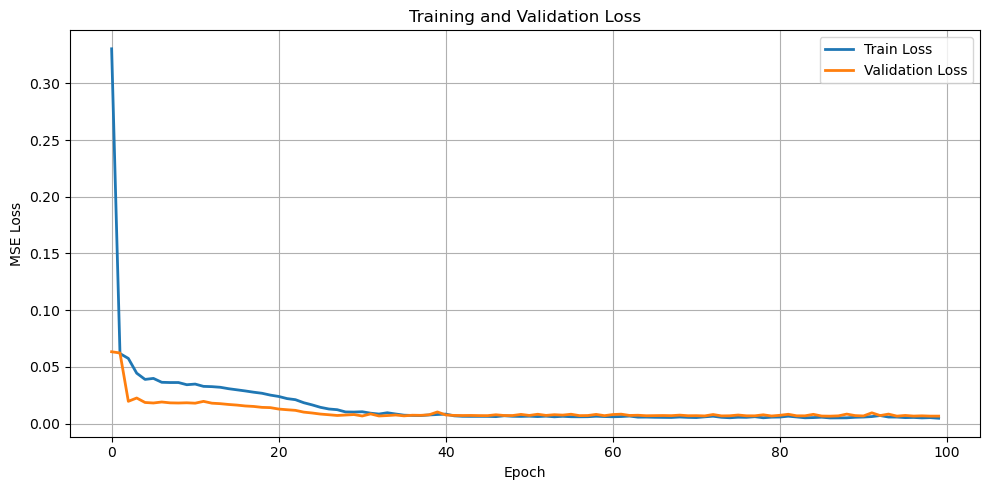

In [26]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


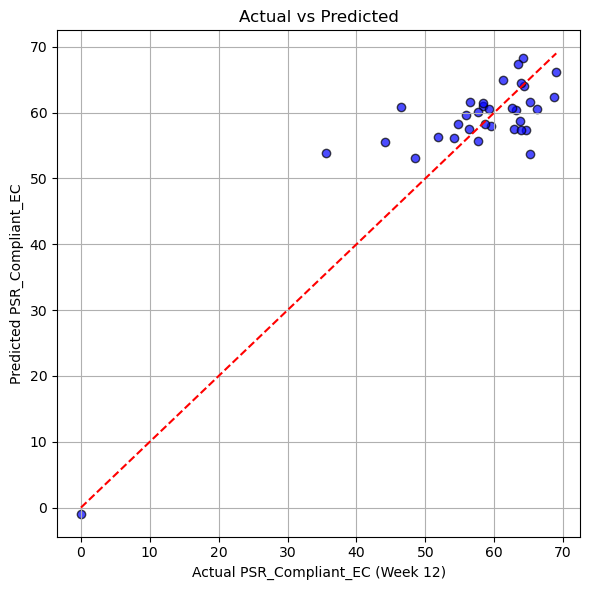

In [27]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test_inv, y_pred_inv, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--')
plt.xlabel('Actual PSR_Compliant_EC (Week 12)')
plt.ylabel('Predicted PSR_Compliant_EC')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()


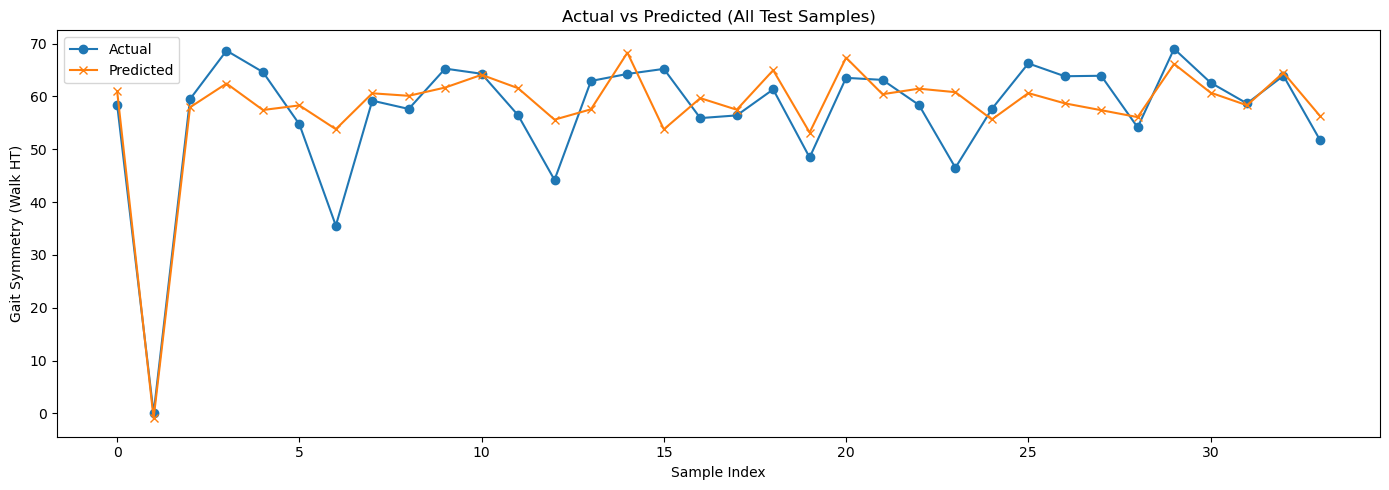

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Plot for entire test set
plt.figure(figsize=(14, 5))
plt.plot(y_test_inv, label='Actual', marker='o')
plt.plot(y_pred_inv, label='Predicted', marker='x')
plt.title('Actual vs Predicted (All Test Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Gait Symmetry (Walk HT)')
plt.legend()
plt.tight_layout()
plt.show()


In [29]:
from sklearn.metrics import r2_score

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse scale
y_train_pred_inv = scaler_y.inverse_transform(y_train_pred)
y_test_pred_inv = scaler_y.inverse_transform(y_test_pred)
y_train_inv = scaler_y.inverse_transform(y_train[:, -1])
y_test_inv = scaler_y.inverse_transform(y_test[:, -1])

# R² Scores
r2_train = r2_score(y_train_inv, y_train_pred_inv)
r2_test = r2_score(y_test_inv, y_test_pred_inv)

print(f"✅ Train R²: {r2_train:.3f}")
print(f"✅ Test R²: {r2_test:.3f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
✅ Train R²: 0.906
✅ Test R²: 0.759


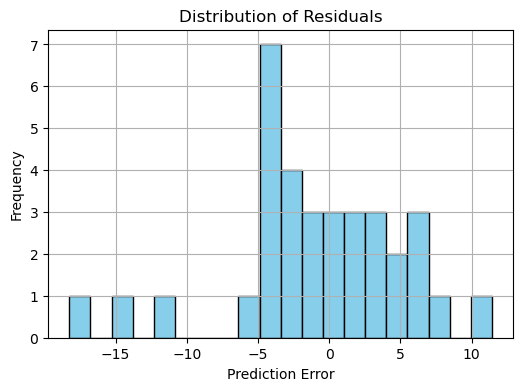

In [30]:
import matplotlib.pyplot as plt

residuals = y_test_inv.flatten() - y_test_pred_inv.flatten()

plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
